# Library Imports & Environment Setup
In this cell, we import all necessary Python libraries for our analysis. pandas and numpy handle data manipulation and numerical computations, while matplotlib and seaborn support data visualization. We also bring in modules from scikit-learn for splitting the dataset, building a Logistic Regression model, and evaluating its performance using metrics like accuracy, confusion matrix, ROC curve, and AUC. Finally, joblib is imported for saving and loading trained models.

This setup ensures our environment is fully equipped for data processing, modeling, and evaluation tasks.

In [1]:
# Import libraries
import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting
import seaborn as sns                # For visualizations

# Data Loading & Initial Exploration
In this section, we load the cleaned fraud detection dataset using pandas. After importing the data, we perform a preliminary examination by displaying its structure (info()), the first few rows (head()), and basic statistical summaries (describe()). This helps us understand the dataset’s shape, types of variables, and general distribution before moving into deeper analysis.

In [2]:

# Load dataset
df = pd.read_csv("Fraud_Cleaned.csv")  # Ensure the correct file path

# Display basic info
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498050 entries, 0 to 498049
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498050 non-null  int64  
 1   totalScanTimeInSeconds     498050 non-null  int64  
 2   grandTotal                 498050 non-null  float64
 3   lineItemVoids              498050 non-null  int64  
 4   scansWithoutRegistration   498050 non-null  int64  
 5   quantityModification       498050 non-null  int64  
 6   scannedLineItemsPerSecond  498050 non-null  float64
 7   valuePerSecond             498050 non-null  float64
 8   lineItemVoidsPerPosition   498050 non-null  float64
 9   fraud                      498050 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 38.0 MB


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModification,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,498050.000000,498050.000000,498050.000000,498050.000000,498050.000000,498050.000000,498050.000000,498050.000000,498050.000000,498050.000000
mean,3.503243,915.605811,49.996116,5.495896,5.001377,2.499034,0.068059,0.222214,0.735200,0.047634
std,1.707661,528.773256,28.869314,3.447630,3.163808,1.708176,0.521129,1.717987,1.320275,0.212990
min,1.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000546,0.000005,0.000000,0.000000
25%,2.000000,458.000000,24.940000,3.000000,2.000000,1.000000,0.008682,0.027360,0.161667,0.000000
50%,4.000000,916.000000,50.040000,5.000000,5.000000,2.000000,0.016940,0.054557,0.352941,0.000000
75%,5.000000,1374.000000,75.020000,8.000000,8.000000,4.000000,0.033929,0.109102,0.692308,0.000000
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.710000,11.000000,1.000000


# Data Exploration 
This section focuses on identifying and addressing potential data quality issues. We begin by checking for missing values and duplicated rows within the dataset. These steps are essential to ensure data integrity and reliability before proceeding to model training and analysis.

In [3]:
# Data Exploration

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModification         0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

Duplicate Rows: 0


# Class Distribution
We visualize the distribution of fraud vs. non-fraud cases and highlight the fraud class for clarity. Class percentages are also printed to check for imbalance, which is important for model performance.

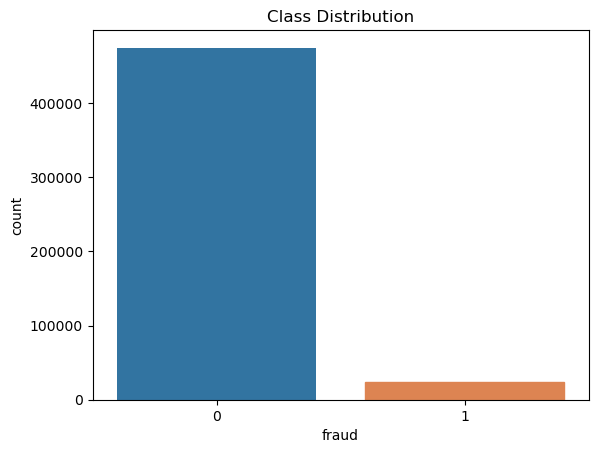

Class distribution (%):
fraud
0    95.236623
1     4.763377
Name: proportion, dtype: float64


In [4]:
# Visualize class distribution with custom color for fraud = 1
ax = sns.countplot(x='fraud', data=df)
ax.patches[1].set_color('#DD8452')  # Set fraud = 1 bar to orange
plt.title('Class Distribution')
plt.show()

# Print class percentages
print("Class distribution (%):")
print(df['fraud'].value_counts(normalize=True) * 100)


The distribution of the target variable fraud is highly imbalanced. The vast majority of transactions are labeled as non-fraudulent (fraud = 0), while only a small fraction are labeled as fraudulent (fraud = 1). Specifically, approximately 95% of the records are non-fraudulent, with only 5% labeled as fraud.

# Feature Distribution by Fraud Status
We examine how each feature is distributed across fraud and non-fraud cases. Continuous features are shown with KDE plots, while categorical ones use stacked histograms. This helps identify patterns and potential predictors of fraud.

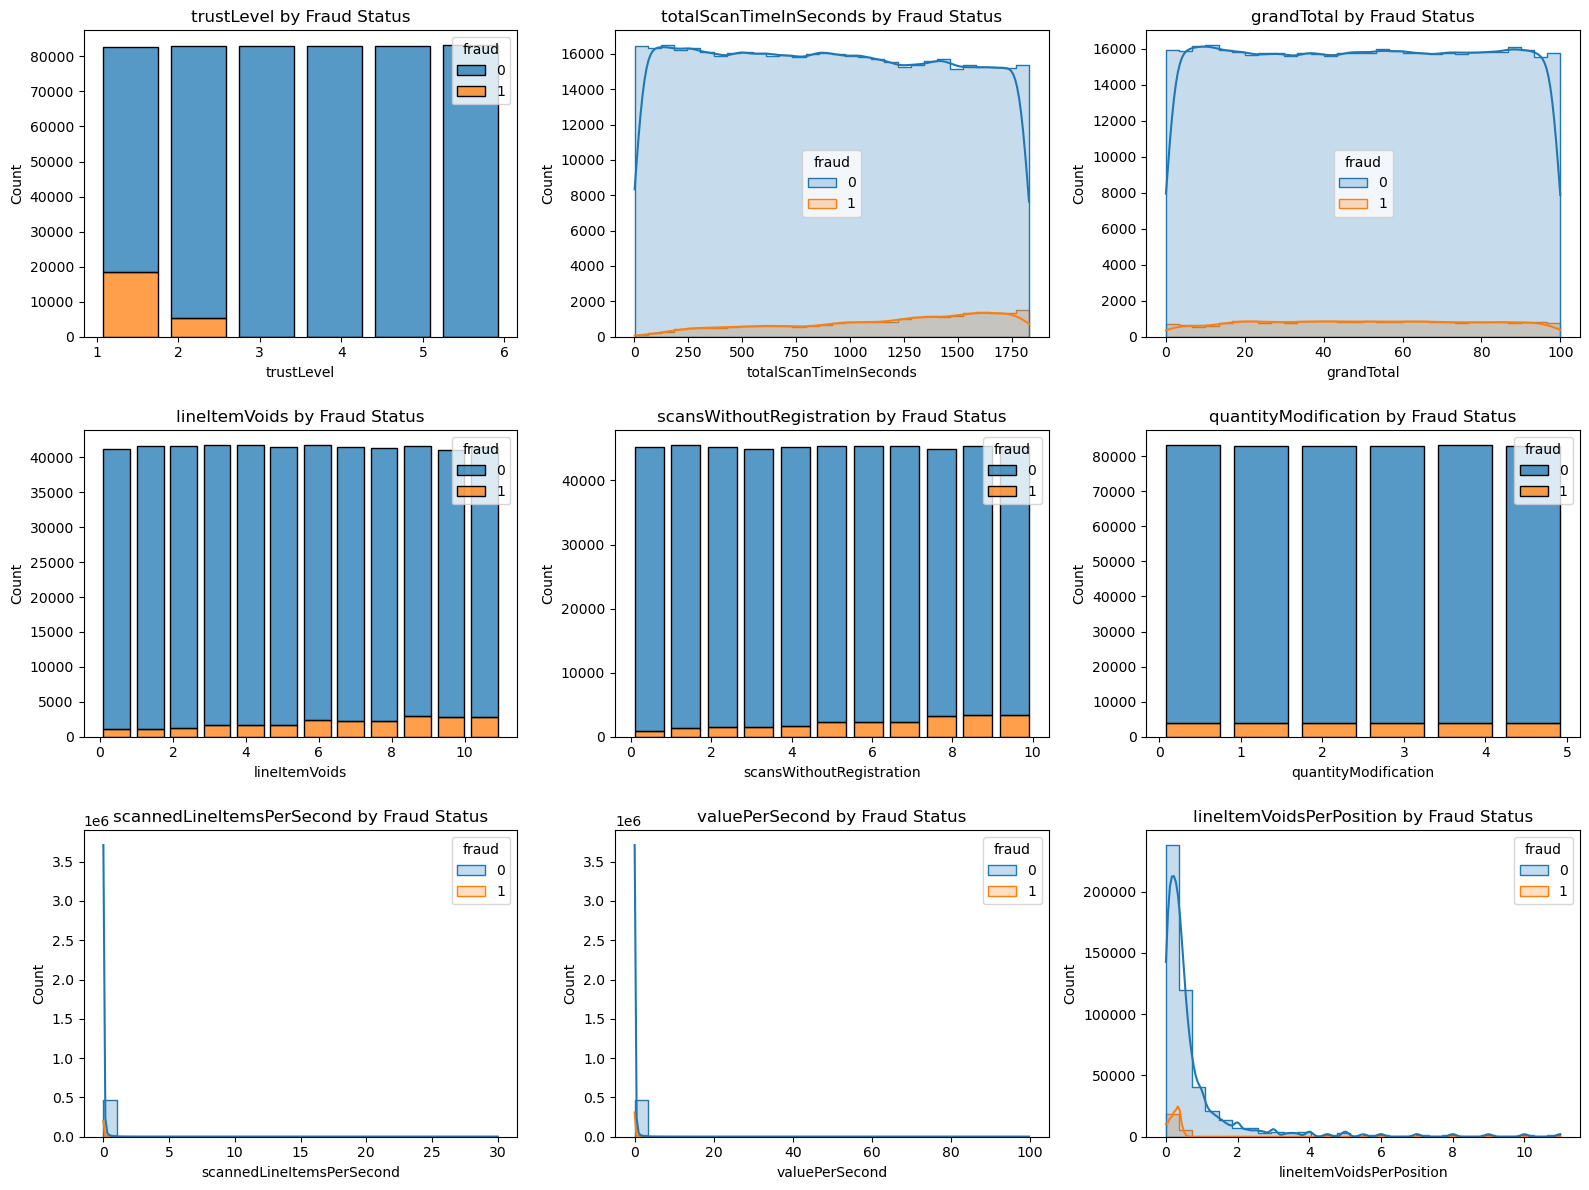

In [5]:

features_to_plot = df.columns.drop("fraud")  # exclude target

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    
    unique_vals = df[feature].nunique()
    
    # Use KDE only for continuous features
    if unique_vals > 20:  # arbitrary threshold;
        sns.histplot(data=df, x=feature, hue="fraud", kde=True, bins=30, element="step")
    else:
        sns.histplot(data=df, x=feature, hue="fraud", kde=False, bins=unique_vals, multiple="stack", shrink=0.8)
    
    plt.title(f"{feature} by Fraud Status")

plt.tight_layout()
plt.show()


The feature trustLevel shows that most non-fraudulent transactions occur at higher trust levels (3–6), while fraud is concentrated at the lowest levels (1 and 2), indicating trust is a strong fraud indicator. totalScanTimeInSeconds and grandTotal display wide distributions with slight elevation in fraud at longer scan durations and higher values, though the separation is not visually distinct. lineItemVoids, scansWithoutRegistration, and quantityModification all show more fraud cases at higher values, supporting their relevance as behavioral indicators of manipulation. In contrast, scannedLineItemsPerSecond and valuePerSecond are extremely skewed, with very few high-value outliers — potentially useful after transformation. Finally, lineItemVoidsPerPosition displays a clear concentration of fraud at higher values, confirming its strong predictive signal. 

# Fraud Breakdown by Low-Cardinality Features
This section analyzes categorical features with few unique values to see how fraud rates vary across their categories. It provides a detailed breakdown of fraud and non-fraud counts and percentages for each feature value, helping reveal patterns and potential risk indicators.

In [6]:

# Define the target column
target_col = "fraud"

# Define what qualifies as "low-cardinality"
max_unique = 12
candidate_features = [col for col in df.columns if col != target_col and df[col].nunique() <= max_unique]

# Loop over each low-cardinality feature
for feature in candidate_features:
    summary_rows = []

    for val in sorted(df[feature].unique()):
        total_count = df[df[feature] == val].shape[0]
        count_yes = df[(df[feature] == val) & (df[target_col] == 1)].shape[0]
        count_no = df[(df[feature] == val) & (df[target_col] == 0)].shape[0]
        pct_yes = (count_yes / total_count) * 100 if total_count > 0 else 0
        pct_no = (count_no / total_count) * 100 if total_count > 0 else 0

        summary_rows.append({
            "Value": val,
            "Total Count": total_count,
            "Fraud Count (Yes)": count_yes,
            "Non-Fraud Count (No)": count_no,
            "% Fraud (Yes)": round(pct_yes, 2),
            "% Non-Fraud (No)": round(pct_no, 2),
        })

    summary_df = pd.DataFrame(summary_rows)

    print(f"\n=== Feature: {feature} ===")
    display(summary_df)



=== Feature: trustLevel ===


,Value,Total Count,Fraud Count (Yes),Non-Fraud Count (No),% Fraud (Yes),% Non-Fraud (No)
0,1,82699,18532,64167,22.41,77.59
1,2,82907,5192,77715,6.26,93.74
2,3,83127,0,83127,0.00,100.00
3,4,82985,0,82985,0.00,100.00
4,5,83036,0,83036,0.00,100.00
5,6,83296,0,83296,0.00,100.00



=== Feature: lineItemVoids ===


,Value,Total Count,Fraud Count (Yes),Non-Fraud Count (No),% Fraud (Yes),% Non-Fraud (No)
0,0,41174,1161,40013,2.82,97.18
1,1,41560,1094,40466,2.63,97.37
2,2,41677,1203,40474,2.89,97.11
3,3,41700,1620,40080,3.88,96.12
4,4,41772,1673,40099,4.01,95.99
5,5,41426,1622,39804,3.92,96.08
6,6,41758,2356,39402,5.64,94.36
7,7,41477,2277,39200,5.49,94.51
8,8,41363,2198,39165,5.31,94.69
9,9,41661,2941,38720,7.06,92.94



=== Feature: scansWithoutRegistration ===


,Value,Total Count,Fraud Count (Yes),Non-Fraud Count (No),% Fraud (Yes),% Non-Fraud (No)
0,0,45226,944,44282,2.09,97.91
1,1,45547,1428,44119,3.14,96.86
2,2,45221,1435,43786,3.17,96.83
3,3,44952,1564,43388,3.48,96.52
4,4,45248,1635,43613,3.61,96.39
5,5,45324,2250,43074,4.96,95.04
6,6,45324,2290,43034,5.05,94.95
7,7,45385,2286,43099,5.04,94.96
8,8,44968,3226,41742,7.17,92.83
9,9,45454,3348,42106,7.37,92.63



=== Feature: quantityModification ===


,Value,Total Count,Fraud Count (Yes),Non-Fraud Count (No),% Fraud (Yes),% Non-Fraud (No)
0,0,83185,3997,79188,4.80,95.20
1,1,83004,3906,79098,4.71,95.29
2,2,82888,4024,78864,4.85,95.15
3,3,82888,3896,78992,4.70,95.30
4,4,83225,3936,79289,4.73,95.27
5,5,82860,3965,78895,4.79,95.21


## trustLevel
The distribution clearly shows that fraud occurs only at the lowest trust levels (1 and 2), with 22.41% and 6.26% fraud rates respectively. From trust level 3 onward, no fraud is recorded, and all transactions are non-fraudulent. This makes trustLevel one of the strongest features in distinguishing between fraudulent and non-fraudulent behavior — the lower the trust level, the higher the risk.

## lineItemVoids
Fraud percentage increases gradually as the number of voided items increases. For example, fraud rates grow from ~2.6% at 1 void to 6.68% at 11 voids. This steady climb suggests that frequent voiding of items is a clear fraud indicator, and the model should weigh this feature accordingly.

## scansWithoutRegistration
This feature also displays a positive correlation with fraud likelihood. The fraud rate rises from 2.09% at 0 attempts to over 7% at 10 attempts. This supports the idea that customers who repeatedly scan without registering items are exhibiting suspicious behavior, making this another strong behavioral predictor of fraud.

## quantityModification
Fraud rates across different quantity modification values (0–5) are quite stable, hovering between 4.7% and 4.85%. This lack of variation suggests that quantityModification does not strongly differentiate between fraud and non-fraud cases. It may be less valuable as a standalone feature but could still support other interactions in the model.



# Feature Correlation Matrix
We use a heatmap to visualize correlations between features. This helps identify multicollinearity and relationships that may influence model performance.

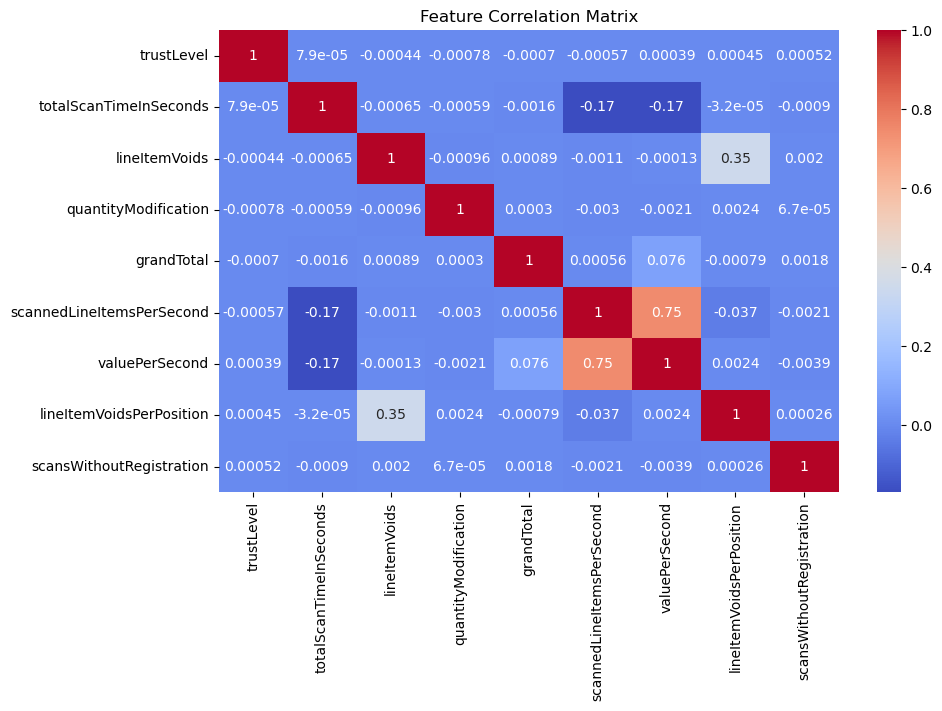

In [10]:
selected_features = [
    "trustLevel", "totalScanTimeInSeconds", "lineItemVoids", 
    "quantityModification", "grandTotal", "scannedLineItemsPerSecond", 
    "valuePerSecond", "lineItemVoidsPerPosition", "scansWithoutRegistration"
]

X = df[selected_features]

# Visualize feature correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

The correlation matrix analysis confirmed that most features are weakly correlated, minimizing the risk of multicollinearity in the logistic regression model. The only notable exception is the strong correlation (0.75) between scannedLineItemsPerSecond and valuePerSecond, which aligns with domain logic. While both features are retained for now to preserve model performance, they may be revisited during feature importance or model refinement steps. Overall, the selected features appear well-suited for modeling, requiring no immediate removals or transformations.

# Outlier Detection with Boxplots
Boxplots are used to visually inspect each feature for potential outliers. This helps identify extreme values that may affect model accuracy or require preprocessing.

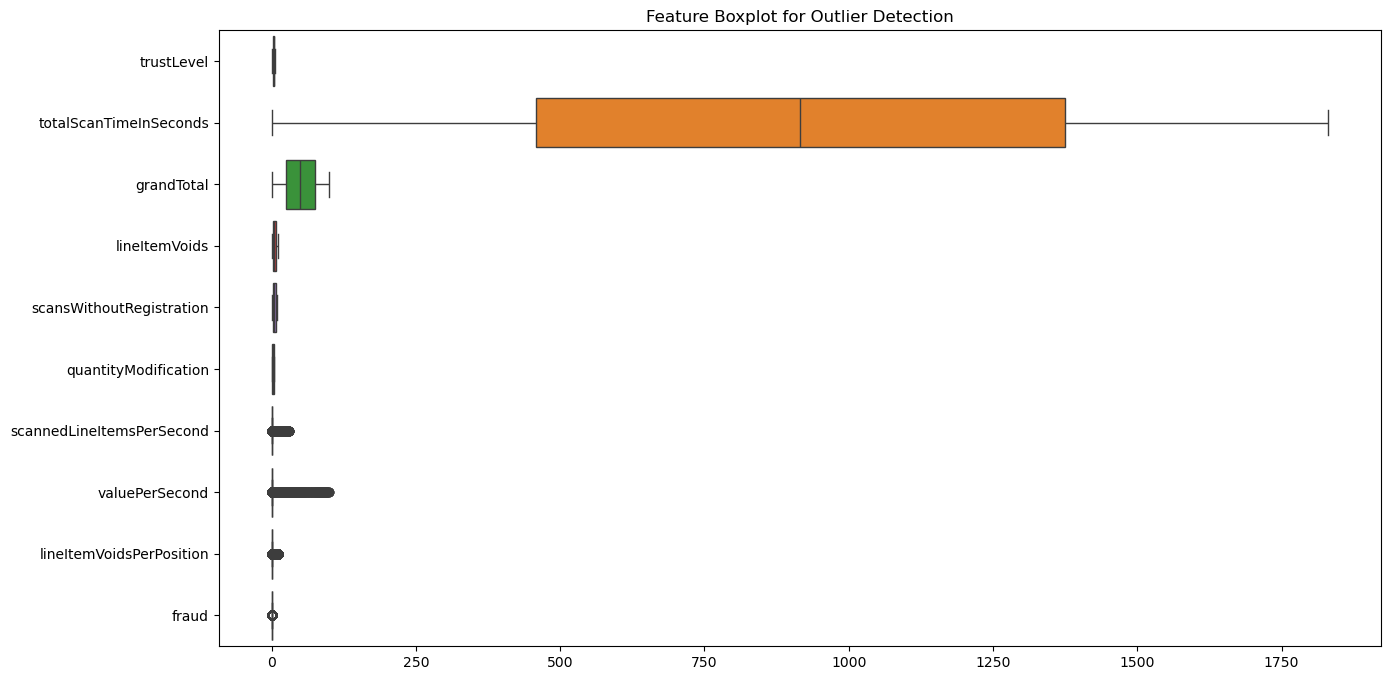

In [9]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, orient="h")
plt.title("Feature Boxplot for Outlier Detection")
plt.show()


The boxplot reveals that most features, such as trustLevel, lineItemVoids, quantityModification, and scansWithoutRegistration, are tightly distributed with limited spread and numerous low-value entries. In contrast, totalScanTimeInSeconds and grandTotal show a wider spread and contain clear outliers, with totalScanTimeInSeconds extending well beyond 1500 seconds, indicating unusually long scanning sessions. Features like valuePerSecond and scannedLineItemsPerSecond are heavily skewed and exhibit extreme outliers, suggesting the need for normalization or transformation prior to modeling. The boxplot effectively highlights which features may require special handling to mitigate the influence of outliers on model performance.